In [ ]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:00


In [ ]:
from importlib.metadata import version

pkgs = ["matplotlib",
        "numpy",
        "tiktoken",
        "torch",
        "tensorflow", # For OpenAI's pretrained weights
        "pandas"      # Dataset loading
       ]
for p in pkgs:
    print(f"{p} version: {version(p)}")

matplotlib version: 3.7.1
numpy version: 1.25.2
tiktoken version: 0.7.0
torch version: 2.3.0+cu121
tensorflow version: 2.15.0
pandas version: 2.0.3


In [ ]:
import urllib.request
import zipfile
import os
from pathlib import Path

url = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path = "sms_spam_collection.zip"
extracted_path = "sms_spam_collection"
data_file_path = Path(extracted_path) / "SMSSpamCollection.tsv"

def download_and_unzip(url, zip_path, extracted_path, data_file_path):
    if data_file_path.exists():
        print(f"{data_file_path} already exists. Skipping download and extraction.")
        return

    # Downloading the file
    with urllib.request.urlopen(url) as response:
        with open(zip_path, "wb") as out_file:
            out_file.write(response.read())

    # Unzipping the file
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extracted_path)

    # Add .tsv file extension
    original_file_path = Path(extracted_path) / "SMSSpamCollection"
    os.rename(original_file_path, data_file_path)
    print(f"File downloaded and saved as {data_file_path}")

download_and_unzip(url, zip_path, extracted_path, data_file_path)

File downloaded and saved as sms_spam_collection/SMSSpamCollection.tsv


In [ ]:
import pandas as pd

df = pd.read_csv(data_file_path, sep="\t", header=None, names=["Label", "Text"])
df["Label"] = df["Label"].map({"ham": 0, "spam": 1})
df

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
print(df["Label"].value_counts())

Label
0    4825
1     747
Name: count, dtype: int64


In [ ]:
def create_balanced_dataset(df):

    # Count the instances of "spam"
    num_spam = df[df["Label"] == "spam"].shape[0]

    # Randomly sample "ham' instances to match the number of 'spam' instances
    ham_subset = df[df["Label"] == "ham"].sample(num_spam, random_state=123)

    # Combine ham "subset" with "spam"
    balanced_df = pd.concat([ham_subset, df[df["Label"] == "spam"]])

    return balanced_df

balanced_df = create_balanced_dataset(df)
print(balanced_df["Label"].value_counts())

Series([], Name: count, dtype: int64)


In [ ]:
balanced_df["Label"] = balanced_df["Label"].map({"ham": 0, "spam": 1})

In [ ]:
data = pd.read_csv('/content/ScamDataNew.csv')
testData=pd.read_excel("/content/scams13.xlsx")
df.rename(columns={'Text':'Scammer'},inplace=True)
testData.rename(columns={'content': 'Scammer'}, inplace=True)
testData.rename(columns={'is scam': 'Label'}, inplace=True)
balanced_df= pd.concat([df, data], ignore_index=True)
balanced_df= pd.concat([balanced_df, testData], ignore_index=True)

In [ ]:
print(balanced_df)

      Label                                            Scammer scam type  \
0         0  Go until jurong point, crazy.. Available only ...       NaN   
1         0                      Ok lar... Joking wif u oni...       NaN   
2         1  Free entry in 2 a wkly comp to win FA Cup fina...       NaN   
3         0  U dun say so early hor... U c already then say...       NaN   
4         0  Nah I don't think he goes to usf, he lives aro...       NaN   
...     ...                                                ...       ...   
7414      0  EXCITING NEWS! Dwayne 'The Rock' Johnson here!...  Phishing   
7415      1  URGENT! Dwayne 'The Rock' Johnson here! I'm gi...  Phishing   
7416      0  Hey! Dwayne 'The Rock' Johnson here! To celebr...  Phishing   
7417      1  URGENT! Dwayne 'The Rock' Johnson here! I've p...  Phishing   
7418      0  EXCITING NEWS! Dwayne 'The Rock' Johnson here!...  Phishing   

                                       trick type  \
0                                 

In [ ]:
def random_split(df, train_frac, validation_frac):
    # Shuffle the entire DataFrame
    df = df.sample(frac=1, random_state=123).reset_index(drop=True)

    # Calculate split indices
    train_end = int(len(df) * train_frac)
    validation_end = train_end + int(len(df) * validation_frac)

    # Split the DataFrame
    train_df = df[:train_end]
    validation_df = df[train_end:validation_end]
    test_df = df[validation_end:]

    return train_df, validation_df, test_df

train_df, validation_df, test_df = random_split(balanced_df, 0.7, 0.1)
# Test size is implied to be 0.2 as the remainder

train_df.to_csv("train.csv", index=None)
validation_df.to_csv("validation.csv", index=None)
test_df.to_csv("test.csv", index=None)

In [ ]:
# train_df.rename(columns={'Text': 'Scammer'}, inplace=True)
# validation_df.rename(columns={'Text': 'Scammer'}, inplace=True)
# test_df.rename(columns={'Text': 'Scammer'}, inplace=True)

In [ ]:
train_df

,Label,Scammer,scam type,trick type,attack type,reason
0,0,Payment overdue on your card ending 7121 for R...,NaN,NaN,NaN,NaN
1,0,Cbe is really good nowadays:)lot of shop and s...,NaN,NaN,NaN,NaN
2,1,Your unique user ID is 1172. For removal send ...,NaN,NaN,NaN,NaN
3,0,Havent.,NaN,NaN,NaN,NaN
4,0,Boooo you always work. Just quit.,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5188,0,I got a call from a landline number. . . I am ...,NaN,NaN,NaN,NaN
5189,0,COME BACK TO TAMPA FFFFUUUUUUU,NaN,NaN,NaN,NaN
5190,1,URGENT: Your Apple acc0unt has been compromize...,Phishing,"Authority, Using Fake Reviews or Ratings to Bu...","Homograph Attack, Intentional spelling mistakes","[""Uses 'Authority' by claiming to be from 'App..."
5191,0,"God picked up a flower and dippeditinaDEW, lov...",NaN,NaN,NaN,NaN


In [ ]:
from transformers import GPT2Tokenizer, GPT2Model
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2',max_length=1000)

In [ ]:
tokenizer.encode("K. I will sent it again")

[42, 13, 314, 481, 1908, 340, 757]

In [ ]:
import torch
from torch.utils.data import Dataset


class SpamDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length=None, pad_token_id=50256):
        self.data = pd.read_csv(csv_file)

        # Pre-tokenize texts
        self.encoded_texts = [
            tokenizer.encode(text) for text in self.data["Scammer"]
        ]

        if max_length is None:
            self.max_length = self._longest_encoded_length()
        else:
            self.max_length = max_length
            # Truncate sequences if they are longer than max_length
            self.encoded_texts = [
                encoded_text[:self.max_length]
                for encoded_text in self.encoded_texts
            ]

        # Pad sequences to the longest sequence
        self.encoded_texts = [
            encoded_text + [pad_token_id] * (self.max_length - len(encoded_text))
            for encoded_text in self.encoded_texts
        ]

    def __getitem__(self, index):
        encoded = self.encoded_texts[index]
        # Assuming label is a string, convert it to an integer before creating the tensor
        label = int(self.data.iloc[index]["Label"])
        return torch.tensor(encoded, dtype=torch.long), torch.tensor(label, dtype=torch.long)


    def __len__(self):
        return len(self.data)

    def _longest_encoded_length(self):
        max_length = 0
        for encoded_text in self.encoded_texts:
            encoded_length = len(encoded_text)
            if encoded_length > max_length:
                max_length = encoded_length
        return max_length

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load the ScamData.csv file


# # Split the data into train and test sets (80% train, 20% test)
# train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# # Further split the train data into train and validation sets (80% train, 20% validation)
# train_data, validation_data = train_test_split(train_data, test_size=0.2, random_state=42)

# # Save the split data into separate CSV files
# train_data.to_csv('train1.csv', index=False)
# test_data.to_csv('test1.csv', index=False)
# validation_data.to_csv('validation1.csv', index=False)

In [ ]:
# merged_df = pd.concat([train_data, train_df], ignore_index=True)
# merged_df=pd.concat([merged_df,test])
# merged_df.to_csv('train2.csv',index=False)
# merged_df1 = pd.concat([test_data, test_df], ignore_index=True)
# merged_df1.to_csv('test2.csv',index=False)
# merged_df2 = pd.concat([validation_data, validation_df], ignore_index=True)
# merged_df2.to_csv('validation2.csv',index=False)

In [ ]:
train_dataset = SpamDataset("train.csv", max_length=None, tokenizer=tokenizer)
print(train_dataset)

In [ ]:
val_dataset = SpamDataset("validation.csv", max_length=train_dataset.max_length, tokenizer=tokenizer)
test_dataset = SpamDataset("test.csv", max_length=train_dataset.max_length, tokenizer=tokenizer)

In [ ]:
from torch.utils.data import DataLoader

num_workers = 0
batch_size = 8

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    drop_last=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

In [ ]:
print(train_loader)
for input_batch, target_batch in train_loader:
    pass
    print("Input batch dimensions:", input_batch.shape)
    print("Label batch dimensions", target_batch.shape)

Input batch dimensions: torch.Size([8, 257])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 257])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 257])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 257])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 257])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 257])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 257])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 257])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 257])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 257])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 257])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 257])
Label batch dimensions torch.Si

In [ ]:
print(f"{len(train_loader)} training batches")
print(f"{len(val_loader)} validation batches")
print(f"{len(test_loader)} test batches")

649 training batches
93 validation batches
186 test batches


In [ ]:
# CHOOSE_MODEL = "gpt2-small (124M)"
# INPUT_PROMPT = "Every effort moves"

# BASE_CONFIG = {
#     "vocab_size": 50257,     # Vocabulary size
#     "context_length": 1024,  # Context length
#     "drop_rate": 0.0,        # Dropout rate
#     "qkv_bias": True         # Query-key-value bias
# }

# model_configs = {
#     "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
#     "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
#     "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
#     "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
# }

# BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

In [ ]:
# from gpt_download import download_and_load_gpt2
# from utils import GPTModel, load_weights_into_gpt

# model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")
# settings, params = download_and_load_gpt2(model_size=model_size, models_dir="gpt2")

# model = GPTModel(BASE_CONFIG)
# load_weights_into_gpt(model, params)
# model.eval();
model = GPT2Model.from_pretrained('distilgpt2')
model.eval();
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

In [ ]:
# from utils import (
#     generate_text_simple,
#     text_to_token_ids,
#     token_ids_to_text
# )


# text_1 = "Every effort moves you"

# token_ids = generate_text_simple(
#     model=model,
#     idx=text_to_token_ids(text_1, tokenizer),
#     max_new_tokens=15,
#     context_size=BASE_CONFIG["context_length"]
# )

# print(token_ids_to_text(token_ids, tokenizer))

In [ ]:
# text_2 = (
#     "Is the following text 'spam'? Answer with 'yes' or 'no':"
#     " 'You are a winner you have been specially"
#     " selected to receive $1000 cash or a $2000 award.'"
#     " Answer with 'yes' or 'no'."
# )

# token_ids = generate_text_simple(
#     model=model,
#     idx=text_to_token_ids(text_2, tokenizer),
#     max_new_tokens=23,
#     context_size=BASE_CONFIG["context_length"]
# )

# print(token_ids_to_text(token_ids, tokenizer))

In [ ]:
print(model)

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-5): 6 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)


In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
torch.manual_seed(123)

num_classes = 2
model.out_head = torch.nn.Linear(in_features=768, out_features=num_classes)

In [ ]:
for param in model.h[-1].parameters():
    param.requires_grad = True

for param in model.ln_f.parameters():
    param.requires_grad = True

In [ ]:
inputs = tokenizer.encode("Do you have time")
inputs = torch.tensor(inputs).unsqueeze(0)
print("Inputs:", inputs)
print("Inputs dimensions:", inputs.shape) # shape: (batch_size, num_tokens)

Inputs: tensor([[5211,  345,  423,  640]])
Inputs dimensions: torch.Size([1, 4])


In [ ]:
with torch.no_grad():
    outputs = model(inputs)

print("Outputs:\n", outputs)
print("Outputs dimensions:", outputs[0].shape) # shape: (batch_size, num_tokens, num_classes)

Outputs:
 BaseModelOutputWithPastAndCrossAttentions(last_hidden_state=tensor([[[ 0.0317,  0.3798, -0.0624,  ..., -0.2326,  0.1347, -0.1138],
         [-0.0347, -0.2202, -0.3072,  ..., -0.1627, -0.0487,  0.3298],
         [ 0.3939,  0.0082, -1.3061,  ..., -0.2604,  0.4336,  0.2004],
         [ 0.8117, -0.3543, -1.2459,  ...,  0.2571,  0.3096,  0.1915]]]), past_key_values=((tensor([[[[-1.0994,  2.3177,  1.2211,  ..., -1.5311, -0.7902,  1.1364],
          [-1.8806,  2.4583,  2.5536,  ..., -0.9601, -1.9421,  1.0221],
          [-1.8011,  2.8406,  2.3653,  ..., -0.8063, -2.8522,  1.6565],
          [-3.1518,  2.7217,  2.8224,  ..., -0.0862, -2.5494,  1.6161]],

         [[ 0.5092, -0.7858, -0.5326,  ..., -0.4770,  2.2333,  0.0144],
          [-0.7958, -2.0695, -1.1748,  ..., -1.7790,  4.8768,  0.0153],
          [ 0.5037,  0.1521, -1.1640,  ..., -1.6524,  3.3693,  0.3842],
          [-0.7979,  0.4668, -1.9158,  ..., -2.1877,  3.5881, -1.2470]],

         [[-0.0729, -0.5676,  0.7095,  ..., -

In [ ]:
print("Last output token:", outputs[0][:, -1, :])

Last output token: tensor([[ 8.1171e-01, -3.5430e-01, -1.2459e+00, -1.5412e-01,  6.5543e-01,
         -8.8496e-02,  1.4950e+00, -1.5117e-01, -3.9650e-01,  3.4764e-02,
          1.0481e+00, -1.0955e-01,  1.9246e-01, -2.0562e-01,  1.2523e-01,
          2.3355e-01, -1.4321e-01,  7.6850e-02, -7.1275e-02, -4.1272e-01,
          9.7501e-02, -3.9924e-01, -6.5992e-01, -6.4883e-01,  1.3287e-01,
         -4.6481e-01, -1.3318e-02, -2.1985e-02, -2.0715e-01,  1.0378e-01,
          3.7294e-01, -6.2228e-01, -2.8820e-01, -3.8752e-01, -9.8934e-02,
          9.6872e-02,  2.3733e+01,  4.7451e-01,  2.9476e-01,  7.1560e-01,
          4.6157e-01, -3.2951e-01,  5.0652e-01, -3.1840e-01, -2.9630e-01,
         -1.5837e-01,  2.5641e-01, -4.4798e-01, -7.5088e-01, -3.7023e-01,
          2.9352e-01,  6.9610e-01,  2.3215e-01,  3.9491e-01,  9.9512e-02,
          1.4651e-01, -1.9988e-01, -1.3202e-01,  3.7080e-01, -2.0201e-01,
          3.2545e-02,  1.9826e-02,  1.1745e-01, -3.5853e-01, -1.2417e+00,
         -5.5155e-0

In [ ]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)[0][:, -1, :]  # Logits of last output token
    loss = torch.nn.functional.cross_entropy(logits, target_batch)
    return loss

In [ ]:
# Same as in chapter 5
def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes

torch.manual_seed(123) # For reproducibility due to the shuffling in the training data loader

with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=5)
    test_loss = calc_loss_loader(test_loader, model, device, num_batches=5)

print(f"Training loss: {train_loss:.3f}")
print(f"Validation loss: {val_loss:.3f}")
print(f"Test loss: {test_loss:.3f}")

Training loss: 64.729
Validation loss: 62.903
Test loss: 64.478


In [ ]:
@torch.no_grad() # Disable gradient tracking for efficiency
def calc_accuracy_loader(data_loader, model, device, num_batches=None):
    model.eval()
    correct_predictions, num_examples = 0, 0

    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            input_batch, target_batch = input_batch.to(device), target_batch.to(device)
            logits = model(input_batch)[0][:, -1, :]  # Logits of last output token
            # print(logits)
            predicted_labels = torch.argmax(logits, dim=-1)

            num_examples += predicted_labels.shape[0]
            correct_predictions += (predicted_labels == target_batch).sum().item()
        else:
            break
    return correct_predictions / num_examples

In [ ]:
torch.manual_seed(123)
train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=10)
val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=10)
test_accuracy = calc_accuracy_loader(test_loader, model, device, num_batches=10)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 0.00%
Validation accuracy: 0.00%
Test accuracy: 0.00%


In [ ]:
# Overall the same as `train_model_simple` in chapter 5
def train_classifier_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                            eval_freq, eval_iter, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous epoch
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            examples_seen += input_batch.shape[0] # New: track examples instead of tokens
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Calculate accuracy after each epoch
        train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=eval_iter)
        val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=eval_iter)
        print(f"Training accuracy: {train_accuracy*100:.2f}% | ", end="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

    return train_losses, val_losses, train_accs, val_accs, examples_seen

In [ ]:
# Same as chapter 5
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [ ]:
import time

start_time = time.time()

torch.manual_seed(123)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.1)

num_epochs = 5
train_losses, val_losses, train_accs, val_accs, examples_seen = train_classifier_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=50, eval_iter=5,
    tokenizer=tokenizer
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 63.346, Val loss 61.306
Ep 1 (Step 000050): Train loss 10.792, Val loss 10.778
Ep 1 (Step 000100): Train loss 6.699, Val loss 6.822
Ep 1 (Step 000150): Train loss 6.033, Val loss 6.114
Ep 1 (Step 000200): Train loss 5.539, Val loss 5.613
Ep 1 (Step 000250): Train loss 4.643, Val loss 4.746
Ep 1 (Step 000300): Train loss 2.825, Val loss 3.231
Ep 1 (Step 000350): Train loss 1.461, Val loss 1.650
Ep 1 (Step 000400): Train loss 0.714, Val loss 0.874
Ep 1 (Step 000450): Train loss 0.544, Val loss 0.661
Ep 1 (Step 000500): Train loss 0.471, Val loss 0.566
Ep 1 (Step 000550): Train loss 0.409, Val loss 0.554
Ep 1 (Step 000600): Train loss 0.403, Val loss 0.520
Training accuracy: 90.00% | Validation accuracy: 75.00%
Ep 2 (Step 000650): Train loss 0.355, Val loss 0.615
Ep 2 (Step 000700): Train loss 0.614, Val loss 0.545
Ep 2 (Step 000750): Train loss 0.372, Val loss 0.539
Ep 2 (Step 000800): Train loss 0.524, Val loss 0.564
Ep 2 (Step 000850): Train loss 0.545, V

In [ ]:
import matplotlib.pyplot as plt

def plot_values(epochs_seen, examples_seen, train_values, val_values, label="loss"):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_values, label=f"Training {label}")
    ax1.plot(epochs_seen, val_values, linestyle="-.", label=f"Validation {label}")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend()

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(examples_seen, train_values, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Examples seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig(f"{label}-plot.pdf")
    plt.show()

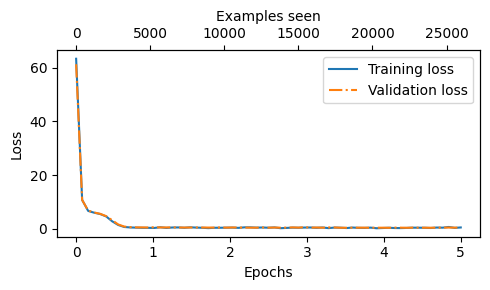

In [ ]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_losses))

plot_values(epochs_tensor, examples_seen_tensor, train_losses, val_losses)

In [ ]:
train_accuracy = calc_accuracy_loader(train_loader, model, device)
val_accuracy = calc_accuracy_loader(val_loader, model, device)
test_accuracy = calc_accuracy_loader(test_loader, model, device)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 78.16%
Validation accuracy: 79.49%
Test accuracy: 77.71%


In [ ]:
def classify_review(text, model, tokenizer, device, max_length=None, pad_token_id=50256):
    model.eval()

    # Prepare inputs to the model
    input_ids = tokenizer.encode(text)
    supported_context_length = 1000

    # Truncate sequences if they too long
    input_ids = input_ids[:min(max_length, supported_context_length)]

    # Pad sequences to the longest sequence
    input_ids += [pad_token_id] * (max_length - len(input_ids))
    input_tensor = torch.tensor(input_ids, device=device).unsqueeze(0) # add batch dimension

    # Model inference
    with torch.no_grad():
        logits = model(input_tensor)[0][:, -1, :]  # Logits of the last output token
    predicted_label = torch.argmax(logits, dim=-1).item()

    # Return the classified result
    return "Positive" if predicted_label == 1 else "Negative"

In [ ]:
text_1 = (
    "You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award."
)

print(classify_review(text_1, model, tokenizer, device, max_length=train_dataset.max_length))

Negative


In [ ]:
text_2 = (
    "Click this link to enter your account details to claim the lottery www.google.com"
)

print(classify_review(text_2, model, tokenizer, device, max_length=train_dataset.max_length))

Negative


In [ ]:
torch.save(model.state_dict(), "spam_classifier.pth")

In [ ]:
model_state_dict = torch.load("spam_classifier.pth")
model.load_state_dict(model_state_dict)

In [ ]:
t1=pd.read_excel('/content/scams12.xlsx')

In [ ]:
text=t1['content']
label=t1['is scam']

In [ ]:
c=0
c1=0
for i in range(len(t1)):
  st=classify_review(text[i], model, tokenizer, device, max_length=train_dataset.max_length)
  pr='Negative' if label[i]==0 else'Positive'
  print(st,pr)
  if st=='Negative':
    c1=c1+1
  if st==pr:
    c=c+1
print(c/len(t1))

Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Positive Positive
Negative N

In [ ]:
print(c1)

448


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install onnx

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from tokenizers import Encoding

# Load fine-tuned GPT-2 model
model_path = "/content/spam_classifier.pth"
model.load_state_dict(torch.load(model_path))
model = model.to("cpu")


# Prepare sample input
text = "Hey enter your account details to claim the prize"
inputs = tokenizer.encode(text)

# Convert Encoding to tensor input
input_ids = torch.tensor(inputs).unsqueeze(0).cpu()

# Export to ONNX
torch.onnx.export(model, input_ids, "modelgpt.onnx", opset_version=12, verbose=True)


In [ ]:
import os

# Path to your ONNX file
onnx_file_path = "modelgpt.onnx"  # Replace with the path to your ONNX file

# Get the size of the ONNX file
onnx_file_size = os.path.getsize(onnx_file_path)

print("Size of the ONNX file:", onnx_file_size, "bytes")

In [ ]:
import os

# Path to your ONNX file
onnx_file_path = "/content/spam_classifier.pth"  # Replace with the path to your ONNX file

# Get the size of the ONNX file
onnx_file_size = os.path.getsize(onnx_file_path)

print("Size of the ONNX file:", onnx_file_size, "bytes")